# Decision Tree Regressor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
data=pd.read_csv('Factory_Salary.csv')

In [ ]:
data.head()

,Date,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,2009-01-01,Metal heater,7,Heating furnaces,22,580,26020.0
1,2009-01-01,Metal heater,6,Heating furnaces,22,580,22980.0
2,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.0
3,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.0
4,2009-01-01,Metal heater,4,Heating furnaces,22,580,18090.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             264 non-null    object 
 1   Profession       264 non-null    object 
 2   Rank             264 non-null    int64  
 3   Equipment        264 non-null    object 
 4   Insalubrity      264 non-null    int64  
 5   Size_Production  264 non-null    int64  
 6   Salary           264 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 14.6+ KB


In [ ]:
data.isna().sum()

Date               0
Profession         0
Rank               0
Equipment          0
Insalubrity        0
Size_Production    0
Salary             0
dtype: int64

In [ ]:
data.describe()

,Rank,Insalubrity,Size_Production,Salary
count,264.000000,264.000000,264.000000,264.000000
mean,4.909091,15.681818,988.333333,21030.461230
std,1.313600,6.682726,231.372715,4323.920780
min,3.000000,0.000000,580.000000,12180.000000
25%,4.000000,11.000000,805.000000,17830.000000
50%,5.000000,18.000000,985.000000,20350.000000
75%,6.000000,22.000000,1185.000000,23818.014706
max,7.000000,22.000000,1400.000000,33157.058824


In [ ]:
data.shape

(264, 7)

In [ ]:
num=data.select_dtypes(include=np.number)
obj=data.select_dtypes(include=object)

sc=StandardScaler()
num1=sc.fit_transform(num)
num1=pd.DataFrame(num1,columns=num.columns)

le=LabelEncoder()
obj1=obj.apply(le.fit_transform)

factory2 = pd.concat([num1,obj1],axis=1)
print(factory2.shape)

(264, 7)


In [ ]:
factory2.head(5)

,Rank,Insalubrity,Size_Production,Salary,Date,Profession,Equipment
0,1.594763,0.947245,-1.768181,1.156130,0,2,2
1,0.832050,0.947245,-1.768181,0.451729,0,2,2
2,0.069338,0.947245,-1.768181,-0.157670,0,2,2
3,0.069338,0.947245,-1.768181,-0.157670,0,2,2
4,-0.693375,0.947245,-1.768181,-0.681337,0,2,2


In [ ]:
y=factory2['Salary']
x=factory2.drop(['Salary'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [ ]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [ ]:
print(mean_squared_error(y_test,pred))
print(r2_score(y_test,pred))

0.010039167546414951
0.9881718820917164


{'whiskers': [<matplotlib.lines.Line2D at 0x7ca1b5bdc970>,
 'caps': [<matplotlib.lines.Line2D at 0x7ca1b5bdcca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ca1b5bdd5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ca1b5bdfca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ca1b5bddc00>],
 'means': []}

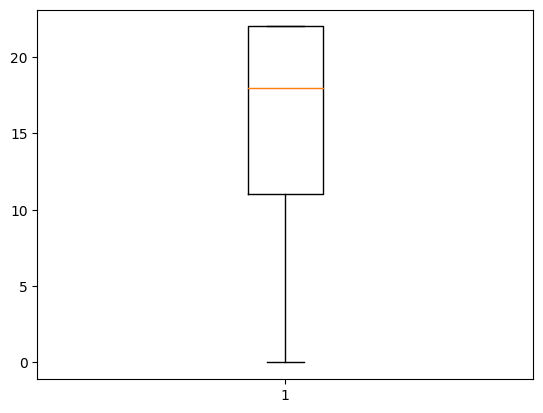

In [ ]:
plt.boxplot(data['Insalubrity'])